In [3]:

!pip install tensorflow

import tensorflow as tf
import os



  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
!pip install opencv-python matplotlib
import cv2
import imghdr
from matplotlib import pyplot as plt

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.1/39.5 MB 11.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/39.5 MB 10.5 MB/s eta 0:00:04
   ------ --------------------------------- 6.3/39.5 MB 10.4 MB/s eta 0:00:04
   -------- ------------------------------- 8.4/39.5 MB 10.4 MB/s eta 0:00:03
   ---------- ----------------------------- 10.7/39.5 MB 10.5 MB/s eta 0:00:03
   ------------ --------------------------- 12.3/39.5 MB 10.2 MB/s eta 0:00:03
   --------------- ------------------------ 15.2/39.5 MB 10.5 MB/s eta 0:00:03
   ----------------- ---------------------- 17.6/39.5 MB 10.6 MB/s eta 0:00:03
   -------------------- ------------------- 20.2/39.5 MB 10.9 MB/s eta 0:00:02
   ----------------------- ---------------- 22.8/39.5 MB 11.0 MB/s eta 0:00:02
   ------------------------ --------------- 24.6/39.5 MB 10.8 MB

C:\Users\mohal\AppData\Local\Temp\ipykernel_3084\175113743.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [12]:
data_dir = 'data'

In [13]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exit list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [15]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 178 files belonging to 2 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

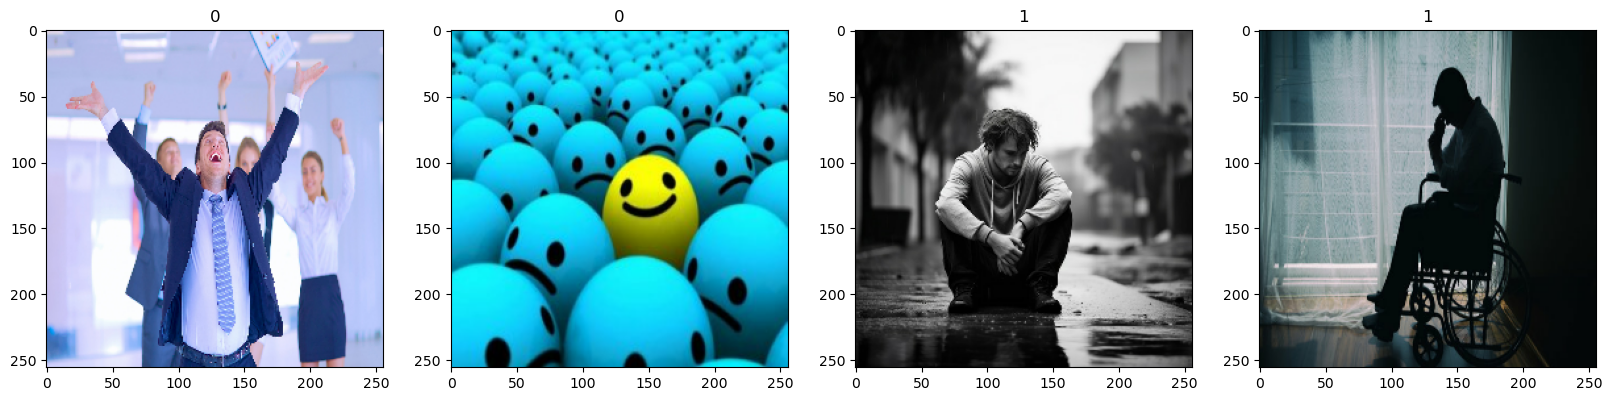

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [28]:
scaled = batch[0] / 255

In [29]:
scaled.max()

1.0

In [30]:
data = data.map(lambda x,y: (x/255, y))

In [31]:
scaled_iterator = data.as_numpy_iterator()

In [32]:
batch = scaled_iterator.next()


6

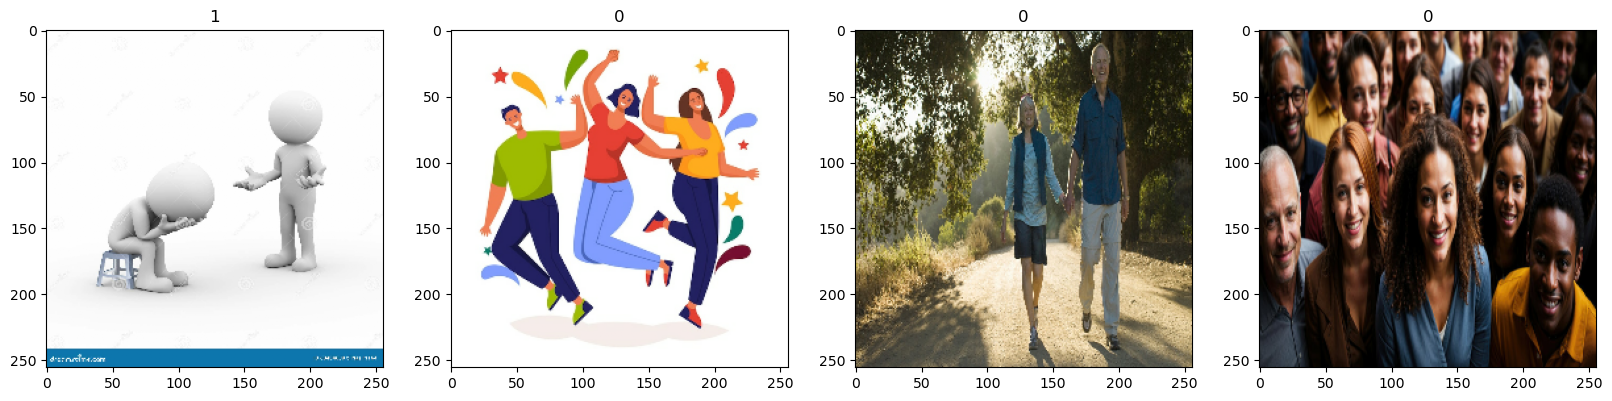

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
len(data)

In [34]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
val_size

2

In [35]:
train = data.take(train_size)
val =  data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()


In [38]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\mohal\Downloads\anaconda dummy\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
logdir='logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [94]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 993ms/step - accuracy: 0.5117 - loss: 0.8555 - val_accuracy: 0.5000 - val_loss: 0.8550
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - accuracy: 0.6628 - loss: 0.5783 - val_accuracy: 0.7188 - val_loss: 0.6333
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step - accuracy: 0.8047 - loss: 0.6015 - val_accuracy: 0.6719 - val_loss: 0.4948
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step - accuracy: 0.6458 - loss: 0.5100 - val_accuracy: 0.8906 - val_loss: 0.4344
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.9193 - loss: 0.4041 - val_accuracy: 0.7656 - val_loss: 0.3777
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step - accuracy: 0.8581 - loss: 0.3266 - val_accuracy: 0.9062 - val_loss: 0.2213
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - accuracy: 0.8750 - loss: 0.2832 - val_accuracy: 0.9062 - val_loss: 0.2393
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.9635 - loss: 0.2141 - val_accuracy: 0.9688 - val_loss:

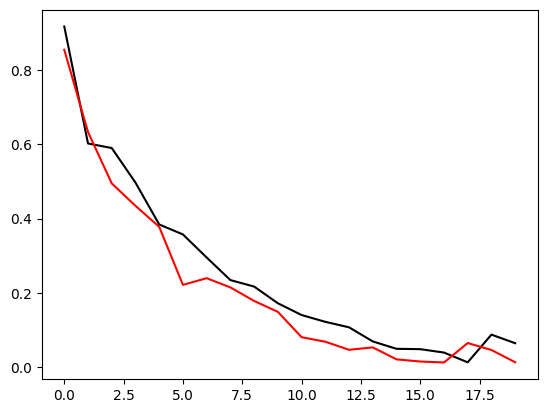

In [95]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='black')
plt.plot(hist.history['val_loss'], color='red')
plt.show()

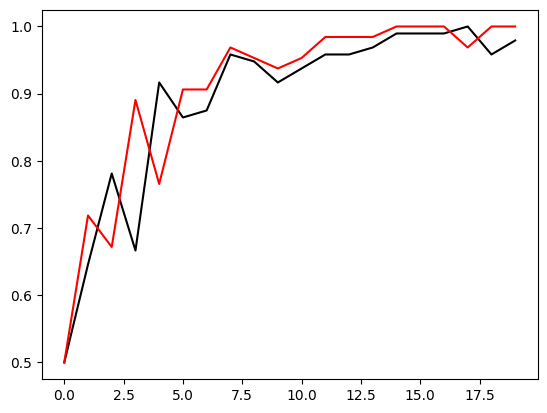

In [96]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='black')
plt.plot(hist.history['val_accuracy'], color='red')
plt.show()

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [99]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


In [104]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")


Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [112]:
import cv2

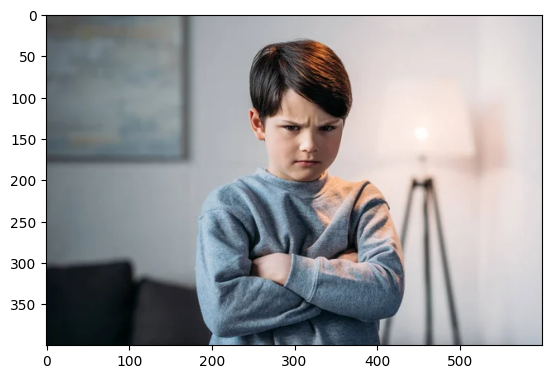

In [132]:
img = cv2.imread('testc.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

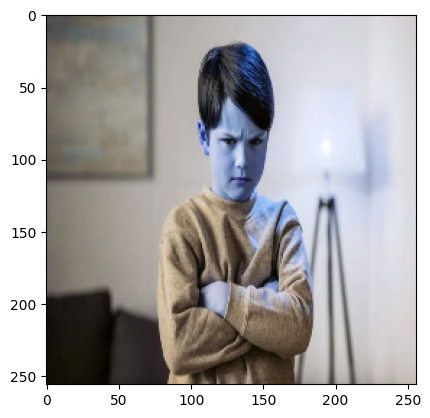

In [133]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [134]:
yhat = model.predict(np.expand_dims(resize/255,0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [135]:
if yhat > 0.5:
    print('Sad')
else:
    print('Happy')

Sad


In [136]:
from tensorflow.keras.models import load_model

In [137]:
model.save(os.path.join('models', 'classifier.h5'))

In [138]:
new_model = load_model(os.path.join('models', 'classifier.h5'))

In [141]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [142]:
if yhatnew > 0.5:
    print('Sad')
else:
    print('Happy')

Sad
